In [1]:
from sklearn.metrics import confusion_matrix, f1_score, roc_curve, precision_score, recall_score, accuracy_score, roc_auc_score
from sklearn import metrics
from mlxtend.plotting import plot_confusion_matrix
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [7]:
names = ["CLASS_01","CLASS_02","CLASS_03","CLASS_04","CLASS_05","CLASS_06","CLASS_07","CLASS_08"]

test_dir = './CarneDataset/test'  

test_data = ImageDataGenerator()

test = test_data.flow_from_directory(
    test_dir,
    target_size=(100, 100), 
    batch_size = 10,
    class_mode='categorical', 
    shuffle=False)

custom_Model= load_model("./exam_model/model.h5")

predictions = custom_Model.predict(test)
y_pred = np.argmax(predictions, axis=1)
y_real = test.classes

matc=confusion_matrix(y_real, y_pred)

Found 810 images belonging to 8 classes.
81/81 [==============================] - 4s 51ms/step


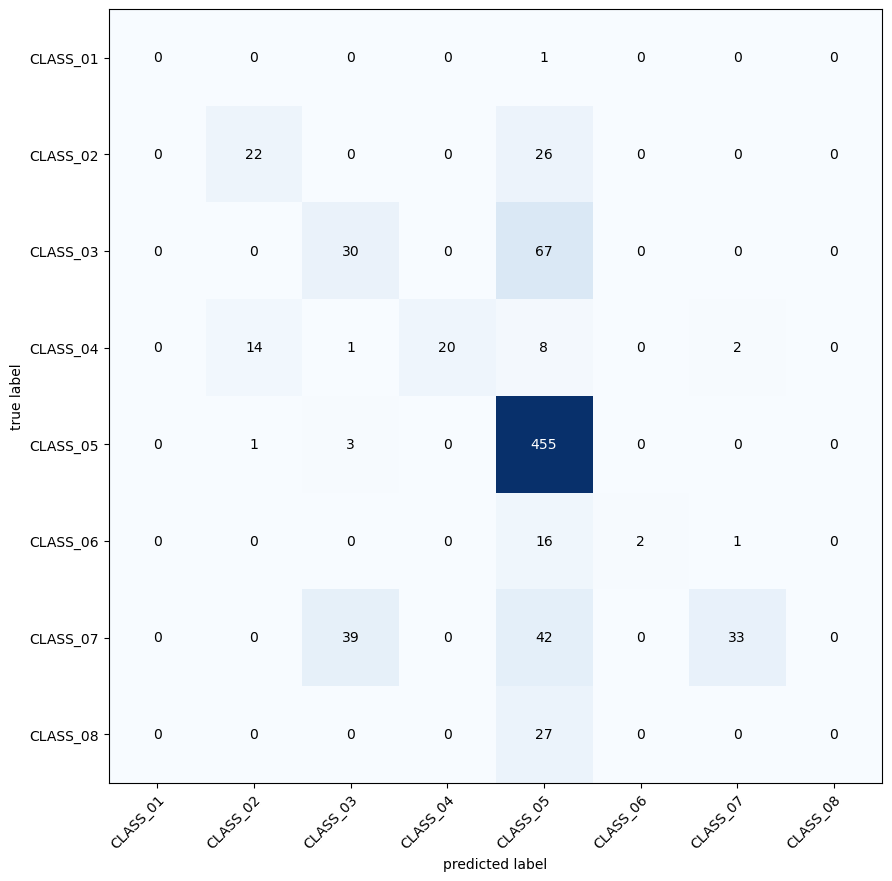

In [8]:
plot_confusion_matrix(conf_mat=matc, figsize=(9,9), class_names = names, show_normed=False)
plt.tight_layout()

In [9]:
print(metrics.classification_report(y_real, y_pred, digits=10, zero_division=0))

              precision    recall  f1-score   support

           0  0.0000000000 0.0000000000 0.0000000000         1
           1  0.5945945946 0.4583333333 0.5176470588        48
           2  0.4109589041 0.3092783505 0.3529411765        97
           3  1.0000000000 0.4444444444 0.6153846154        45
           4  0.7087227414 0.9912854031 0.8265213442       459
           5  1.0000000000 0.1052631579 0.1904761905        19
           6  0.9166666667 0.2894736842 0.4400000000       114
           7  0.0000000000 0.0000000000 0.0000000000        27

    accuracy                      0.6938271605       810
   macro avg  0.5788678634 0.3247597967 0.3678712982       810
weighted avg  0.6940830772 0.6938271605 0.6418851917       810

